In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('ggplot')

import geopandas as gpd
import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.2f}'.format

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_dir = 'Data/527325_1332417_bundle_archive/'

In [3]:
data_file = 'TimeProvince.csv'

Data = pd.read_csv(os.path.join(data_dir,data_file))

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2771 non-null   object
 1   time       2771 non-null   int64 
 2   province   2771 non-null   object
 3   confirmed  2771 non-null   int64 
 4   released   2771 non-null   int64 
 5   deceased   2771 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 130.0+ KB


In [5]:
Data.date = pd.to_datetime(Data.date)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2771 non-null   datetime64[ns]
 1   time       2771 non-null   int64         
 2   province   2771 non-null   object        
 3   confirmed  2771 non-null   int64         
 4   released   2771 non-null   int64         
 5   deceased   2771 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 130.0+ KB


In [7]:
Data.province.value_counts().to_frame()

,province
Sejong,163
Gyeonggi-do,163
Incheon,163
Chungcheongbuk-do,163
Gyeongsangbuk-do,163
Ulsan,163
Gyeongsangnam-do,163
Seoul,163
Jeju-do,163
Chungcheongnam-do,163


In [8]:
Data_province = dict(list(Data.groupby('province')))

In [9]:
Seoul = Data_province['Seoul']

In [10]:
Seoul.date

0      2020-01-20
17     2020-01-21
34     2020-01-22
51     2020-01-23
68     2020-01-24
          ...    
2686   2020-06-26
2703   2020-06-27
2720   2020-06-28
2737   2020-06-29
2754   2020-06-30
Name: date, Length: 163, dtype: datetime64[ns]

##### Patentinfo file for 동별 확진사수 세기

In [11]:
Data2 = pd.read_csv(os.path.join(data_dir,'PatientInfo.csv'))

In [12]:
Data2.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [13]:
Data2.province.value_counts().to_frame()

,province
Seoul,1312
Gyeongsangbuk-do,1254
Gyeonggi-do,1208
Incheon,343
Chungcheongnam-do,168
Busan,151
Daegu,137
Gyeongsangnam-do,133
Daejeon,119
Gangwon-do,63


In [14]:
Data2_province = dict(list(Data2.groupby('province')))

In [15]:
# 6월30일까지 가정
Data2_province['Seoul'].groupby('city').count()['patient_id'].sort_values(ascending = False).to_frame()

,patient_id
city,
Gwanak-gu,113
Guro-gu,85
Gangnam-gu,83
etc,80
Gangseo-gu,78
Yangcheon-gu,71
Dobong-gu,62
Yeongdeungpo-gu,62
Songpa-gu,55


##### 서울시 자치구 단위 서울 생활인구 일별 집게표

In [16]:
data_dir2 = 'Data/'

In [17]:
Data3 = pd.read_csv(os.path.join(data_dir2,'population_per_gu.csv'),encoding = 'cp949')

In [18]:
Data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22100 entries, 0 to 22099
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   기준일ID           22100 non-null  int64  
 1   시군구코드           22100 non-null  int64  
 2   시군구명            22100 non-null  object 
 3   총생활인구수          22100 non-null  float64
 4   내국인생활인구수        22100 non-null  float64
 5   장기체류외국인인구수      22100 non-null  float64
 6   단기체류외국인인구수      22100 non-null  float64
 7   일최대인구수          22100 non-null  float64
 8   일최소인구수          22100 non-null  float64
 9   주간인구수(09~18)    22100 non-null  float64
 10  야간인구수(19~08)    22100 non-null  float64
 11  일최대이동인구수        22100 non-null  float64
 12  서울외유입인구수        22100 non-null  float64
 13  동일자치구행정동간이동인구수  22100 non-null  float64
 14  자치구간이동인구수       22100 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 2.5+ MB


In [19]:
Data3.head()

,기준일ID,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
0,20200819,11000,서울시,11042999.70,10561393.32,387588.09,94018.29,11318466.10,10776591.01,11275382.65,10877011.88,6136586.17,1404718.42,2222364.91,2509502.84
1,20200819,11110,종로구,306814.49,286749.09,16327.43,3737.97,405002.30,228240.43,382639.36,252653.87,269428.86,64012.56,34835.80,170580.49
2,20200819,11140,중구,301889.38,274101.29,19597.04,8191.05,434058.34,196863.22,405874.37,227614.38,316459.99,79174.12,34062.37,203223.51
3,20200819,11170,용산구,305519.32,283285.71,17820.65,4412.96,327996.79,280015.79,325405.55,291314.88,184497.36,45849.81,48964.94,89682.61
4,20200819,11200,성동구,364006.98,346269.20,14988.60,2749.18,380060.24,344510.06,377081.29,354668.19,213699.41,39869.24,66339.39,107490.78


In [20]:
Data3.기준일ID = Data3.기준일ID.apply(lambda x : str(x))

In [21]:
Data3.기준일ID.apply(lambda x : x[4:6])

0        08
1        08
2        08
3        08
4        08
         ..
22095    04
22096    04
22097    04
22098    04
22099    04
Name: 기준일ID, Length: 22100, dtype: object

In [22]:
def Change_data(data):
    New_data = data[:4]+'-'+data[4:6]+'-'+data[6:]
    return New_data

In [23]:
Data3.기준일ID = Data3.기준일ID.apply(Change_data)

In [24]:
Data3.기준일ID = pd.to_datetime(Data3.기준일ID,format = "%Y-%m-%d")

In [25]:
Data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22100 entries, 0 to 22099
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   기준일ID           22100 non-null  datetime64[ns]
 1   시군구코드           22100 non-null  int64         
 2   시군구명            22100 non-null  object        
 3   총생활인구수          22100 non-null  float64       
 4   내국인생활인구수        22100 non-null  float64       
 5   장기체류외국인인구수      22100 non-null  float64       
 6   단기체류외국인인구수      22100 non-null  float64       
 7   일최대인구수          22100 non-null  float64       
 8   일최소인구수          22100 non-null  float64       
 9   주간인구수(09~18)    22100 non-null  float64       
 10  야간인구수(19~08)    22100 non-null  float64       
 11  일최대이동인구수        22100 non-null  float64       
 12  서울외유입인구수        22100 non-null  float64       
 13  동일자치구행정동간이동인구수  22100 non-null  float64       
 14  자치구간이동인구수       22100 non-null  float64       
dtypes:

In [26]:
Test = Data3.copy()

In [27]:
Test = Test.set_index('기준일ID')

In [28]:
Test

,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
기준일ID,,,,,,,,,,,,,,
2020-08-19,11000,서울시,11042999.70,10561393.32,387588.09,94018.29,11318466.10,10776591.01,11275382.65,10877011.88,6136586.17,1404718.42,2222364.91,2509502.84
2020-08-19,11110,종로구,306814.49,286749.09,16327.43,3737.97,405002.30,228240.43,382639.36,252653.87,269428.86,64012.56,34835.80,170580.49
2020-08-19,11140,중구,301889.38,274101.29,19597.04,8191.05,434058.34,196863.22,405874.37,227614.38,316459.99,79174.12,34062.37,203223.51
2020-08-19,11170,용산구,305519.32,283285.71,17820.65,4412.96,327996.79,280015.79,325405.55,291314.88,184497.36,45849.81,48964.94,89682.61
2020-08-19,11200,성동구,364006.98,346269.20,14988.60,2749.18,380060.24,344510.06,377081.29,354668.19,213699.41,39869.24,66339.39,107490.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-05,11620,관악구,527264.11,503642.17,22109.71,1512.23,595473.66,452064.88,466298.39,570811.06,252601.49,33524.09,144364.95,74712.45
2018-04-05,11650,서초구,657040.93,636655.73,14811.87,5573.33,783025.59,523063.01,762001.91,582068.81,513324.49,159547.80,98862.15,254914.54
2018-04-05,11680,강남구,912863.87,871371.52,22101.36,19390.99,1147910.74,692878.73,1105394.22,775342.19,751766.50,226143.08,140222.36,385401.06


In [29]:
Test_Adj = Test[Test.시군구코드 != 11000]

In [30]:
# Kaggle데이터와 기간을 비교함.
Test_same = Test_Adj['2020-06-30' : '2020-01-19']

In [31]:
Test_same.groupby('시군구명').sum()['총생활인구수'].sort_values(ascending = False).to_frame()

,총생활인구수
시군구명,
강남구,137726568.95
송파구,126746257.35
서초구,97231385.62
강서구,91201826.39
노원구,87943324.06
강동구,84779526.63
관악구,84639785.91
영등포구,81708767.82
마포구,79568021.38


##### 케글 데이터와 비교만으로는 신뢰성 불가 판단.
kaggle데이터는 etc..라고 전체 구를 표현 안함.. 그나마 공공데이터(http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do#AXexec)에서 제공한 데이터와 비교분석.

In [32]:
Data4 = pd.read_csv(os.path.join(data_dir2,'Seoul_Covid19_confirmed.csv'),encoding = 'cp949')

In [33]:
Data4.확진일 = Data4.확진일.apply(lambda x : x[:len(x)-1])

In [34]:
Data4.확진일

0       8.23
1       8.23
2       8.23
3       8.23
4       8.23
        ... 
2981    1.31
2982    1.30
2983    1.30
2984    1.30
2985    1.24
Name: 확진일, Length: 2986, dtype: object

In [35]:
Data4.확진일 = Data4.확진일.apply(lambda x : '2020.' + x)

In [36]:
Data4.확진일= Data4.확진일.str.replace('.','-')

In [37]:
Data4.확진일 = pd.to_datetime(Data4.확진일, format = '%Y-%m-%d')

In [38]:
Data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      2986 non-null   int64         
 1   확진일     2986 non-null   datetime64[ns]
 2   환자번호    2986 non-null   object        
 3   국적      2986 non-null   object        
 4   환자정보    0 non-null      float64       
 5   지역      2986 non-null   object        
 6   여행력     382 non-null    object        
 7   접촉력     2986 non-null   object        
 8   조치사항    2985 non-null   object        
 9   상태      1655 non-null   object        
 10  이동경로    2785 non-null   object        
 11  등록일     2986 non-null   object        
 12  수정일     2986 non-null   object        
 13  노출여부    2986 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 326.7+ KB


In [39]:
Test2 = Data4.copy()

In [40]:
Test2= Test2.set_index('확진일')

Test_Adj데이터 불러와서 날짜 다시 확인

In [41]:
Test_Adj

,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
기준일ID,,,,,,,,,,,,,,
2020-08-19,11110,종로구,306814.49,286749.09,16327.43,3737.97,405002.30,228240.43,382639.36,252653.87,269428.86,64012.56,34835.80,170580.49
2020-08-19,11140,중구,301889.38,274101.29,19597.04,8191.05,434058.34,196863.22,405874.37,227614.38,316459.99,79174.12,34062.37,203223.51
2020-08-19,11170,용산구,305519.32,283285.71,17820.65,4412.96,327996.79,280015.79,325405.55,291314.88,184497.36,45849.81,48964.94,89682.61
2020-08-19,11200,성동구,364006.98,346269.20,14988.60,2749.18,380060.24,344510.06,377081.29,354668.19,213699.41,39869.24,66339.39,107490.78
2020-08-19,11215,광진구,385602.49,360335.67,21880.59,3386.22,408255.12,355319.19,363731.66,401224.51,172157.27,31523.56,78429.61,62204.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-05,11620,관악구,527264.11,503642.17,22109.71,1512.23,595473.66,452064.88,466298.39,570811.06,252601.49,33524.09,144364.95,74712.45
2018-04-05,11650,서초구,657040.93,636655.73,14811.87,5573.33,783025.59,523063.01,762001.91,582068.81,513324.49,159547.80,98862.15,254914.54
2018-04-05,11680,강남구,912863.87,871371.52,22101.36,19390.99,1147910.74,692878.73,1105394.22,775342.19,751766.50,226143.08,140222.36,385401.06


Test_Adj데이터를 Test2데이터와 기간 통일시킴

In [42]:
compare_gu = list(Test_Adj[:'2020-01-24'].groupby('시군구명').sum()['총생활인구수'].sort_values(ascending = False).index)

In [43]:
Test_Adj[:'2020-01-24'].groupby('시군구명').sum()['총생활인구수'].sort_values(ascending = False).to_frame()

,총생활인구수
시군구명,
강남구,176097811.94
송파구,161006455.90
서초구,123998414.44
강서구,115925414.61
노원구,111497087.10
강동구,107832394.96
관악구,107450238.80
영등포구,104226805.07
마포구,101326705.75


In [44]:
compare_gu

['강남구',
 '송파구',
 '서초구',
 '강서구',
 '노원구',
 '강동구',
 '관악구',
 '영등포구',
 '마포구',
 '은평구',
 '성북구',
 '구로구',
 '동작구',
 '양천구',
 '광진구',
 '서대문구',
 '동대문구',
 '중랑구',
 '성동구',
 '용산구',
 '강북구',
 '종로구',
 '도봉구',
 '중구',
 '금천구']

In [45]:
temp_list = []

In [46]:
for i in compare_gu:
     temp_list.append(Test2['2020-08-19':][Test2['2020-08-19':].지역 == i].shape[0])

In [47]:
temp_list

[124,
 160,
 96,
 137,
 104,
 81,
 167,
 85,
 82,
 106,
 168,
 103,
 100,
 89,
 49,
 56,
 79,
 82,
 70,
 73,
 64,
 39,
 97,
 31,
 44]

In [48]:
compare_dict = dict((zip(compare_gu,temp_list)))

In [49]:
Compare_table = pd.DataFrame(compare_dict,index= ['확진자수']).T

In [50]:
Compare_table

,확진자수
강남구,124
송파구,160
서초구,96
강서구,137
노원구,104
강동구,81
관악구,167
영등포구,85
마포구,82
은평구,106


<b>생활인구란?</b> : 서울시와 KT가 공공빅데이터와 통신데이터를 이용하여 추계한 서울의 특정지역, 특정시점에 존재하는 모든 인구

In [51]:
Test_Adj[:'2020-01-24'].groupby('시군구명').sum()['총생활인구수'].sort_values(ascending = False).to_frame()

,총생활인구수
시군구명,
강남구,176097811.94
송파구,161006455.90
서초구,123998414.44
강서구,115925414.61
노원구,111497087.10
강동구,107832394.96
관악구,107450238.80
영등포구,104226805.07
마포구,101326705.75


<b>서울시 확진자수 비교</b>

In [52]:
Compare_table

,확진자수
강남구,124
송파구,160
서초구,96
강서구,137
노원구,104
강동구,81
관악구,167
영등포구,85
마포구,82
은평구,106


In [53]:
cor1 = list(Test_Adj[:'2020-01-24'].groupby('시군구명').sum()['총생활인구수'].sort_values(ascending = False).to_frame().values)

In [54]:
cor2 = list(Compare_table.values)

In [55]:
Dict = {'총생활인구수' : cor1, "확진자수" : cor2}

In [56]:
Test3 = pd.DataFrame(Dict)

In [57]:
Test3.총생활인구수 = Test3.총생활인구수.str[0]

In [58]:
Test3.확진자수 = Test3.확진자수.str[0]

In [59]:
Test3.corr()

,총생활인구수,확진자수
총생활인구수,1.00,0.66
확진자수,0.66,1.00


##### Tmap데이터 확인

In [60]:
Data4 = pd.read_csv('Data/Tmap_2007.csv',encoding = 'utf-8')

In [61]:
Data4.head()

,일자,지역(시도),지역(시군구),검색지명,검색지유형1,검색지유형2,검색지유형3,검색지랭킹(시군구내)
0,20200702,강원,정선군,마운틴콘도,여행/레저,숙박,콘도/리조트,1
1,20200702,강원,정선군,하이원리조트,여행/레저,숙박,콘도/리조트,2
2,20200702,강원,정선군,정선아리랑시장,쇼핑,시장,재래시장,3
3,20200702,강원,정선군,강원랜드카지노,여행/레저,레저/스포츠,카지노,4
4,20200702,강원,정선군,하이원CC,여행/레저,레저/스포츠,골프장,5


In [62]:
Data4['지역(시도)'].value_counts().to_frame()

,지역(시도)
경기,39060
서울,23250
경북,22320
경남,20460
전남,20460
강원,16740
충남,14880
부산,14880
전북,13950
충북,13020


In [63]:
Data4_region = dict(list(Data4.groupby('지역(시도)')))

In [64]:
Data4_region['서울']['지역(시군구)'].value_counts().to_frame()

,지역(시군구)
종로구,930
마포구,930
노원구,930
중랑구,930
동작구,930
강동구,930
양천구,930
도봉구,930
강남구,930
동대문구,930


In [65]:
# 서울에 구별 방문자 수 By Tamp - 930번씩 돌이하게 나와서 별 의미 없음.
Seoul_Region = Data4_region['서울']

In [66]:
# 검색지 유형3로 구분해보자.
Seoul_Region[Seoul_Region['검색지랭킹(시군구내)'] == 1].groupby(['일자','검색지유형3'])['지역(시도)'].count().to_frame()

지역(시도)
일자       검색지유형3        
20200701 공원           2
         공항           1
         기차역          1
         대학교          2
         방송사          1
...                 ...
20200731 아파트브랜드       2
         전문상가         2
         종합병원         6
         지하철역         5
         호텔           1

[366 rows x 1 columns]

In [67]:
Seoul_Region.head()

,일자,지역(시도),지역(시군구),검색지명,검색지유형1,검색지유형2,검색지유형3,검색지랭킹(시군구내)
1080,20200702,서울,강동구,고덕래미안힐스테이트아파트,건물/시설,주요건물,아파트브랜드,1
1081,20200702,서울,강동구,천호역,교통편의,교통시설,지하철역,2
1082,20200702,서울,강동구,고덕그라시움아파트,건물/시설,주요건물,아파트단지,3
1083,20200702,서울,강동구,강동구청,공공편의,행정기관,도/시/구/군청,4
1084,20200702,서울,강동구,강동롯데캐슬퍼스트아파트,건물/시설,주요건물,아파트브랜드,5


In [68]:
# 별 의미 없음.
Seoul_Region['검색지랭킹(시군구내)'].value_counts()

15    775
30    775
1     775
17    775
2     775
18    775
3     775
19    775
4     775
20    775
5     775
21    775
6     775
22    775
7     775
23    775
8     775
24    775
9     775
25    775
10    775
26    775
11    775
27    775
12    775
28    775
13    775
29    775
14    775
16    775
Name: 검색지랭킹(시군구내), dtype: int64

In [69]:
# 어느 구가 있는 지 파악해보자 - 25개 모든 구 존재.
Seoul_Region['지역(시군구)'].value_counts().to_frame()

,지역(시군구)
종로구,930
마포구,930
노원구,930
중랑구,930
동작구,930
강동구,930
양천구,930
도봉구,930
강남구,930
동대문구,930


7월 2일만 보자

In [70]:
Test_data =Seoul_Region[Seoul_Region['일자']==20200702].groupby(['검색지랭킹(시군구내)','검색지유형1'])['일자'].count().unstack(level = 0)

In [71]:
pd.crosstab(Seoul_Region[Seoul_Region['일자']==20200702]['검색지랭킹(시군구내)'],Seoul_Region[Seoul_Region['일자']==20200702]['검색지유형1'])

검색지유형1,건물/시설,공공편의,교통편의,금융편의,기업/단체,생활편의,쇼핑,여행/레저,의료편의
검색지랭킹(시군구내),,,,,,,,,
1,4,3,4,0,0,0,7,2,5
2,5,2,4,0,0,1,8,0,5
3,7,3,2,0,0,0,7,3,3
4,7,6,3,0,0,0,8,1,0
5,10,4,3,0,0,0,4,3,1
6,5,2,3,0,1,1,7,1,5
7,11,2,3,0,0,2,5,1,1
8,10,5,3,0,0,0,1,2,4
9,9,2,1,0,0,0,10,1,2


현재 시간대 별로 검색지 랭킹별 검색 유형 3을 파악

In [72]:
Seoul_rank = dict(list(Seoul_Region.groupby('검색지랭킹(시군구내)')))

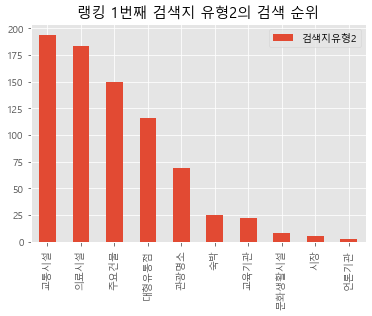

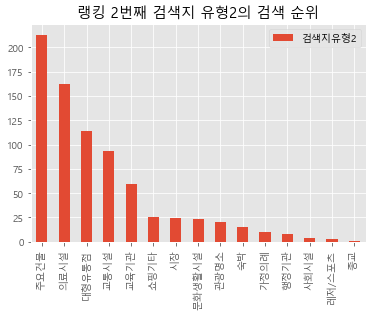

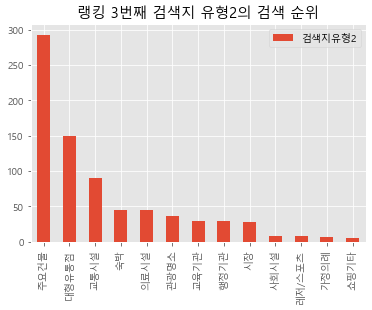

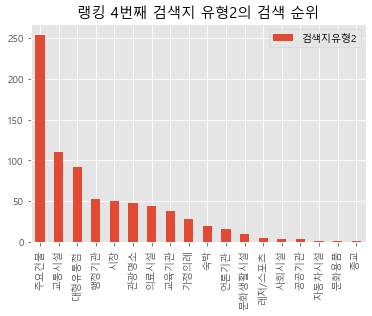

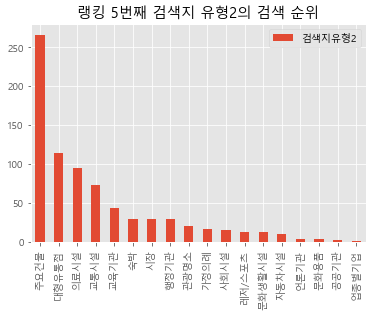

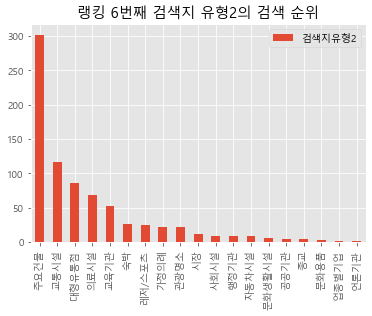

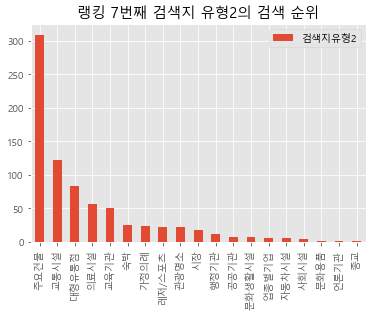

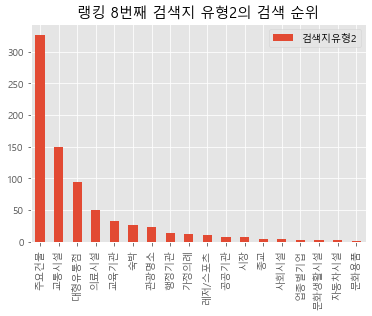

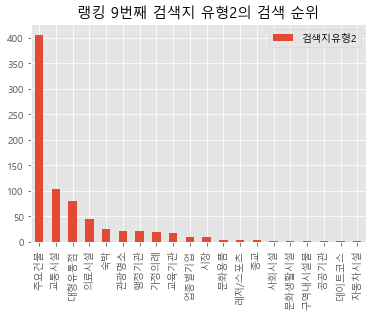

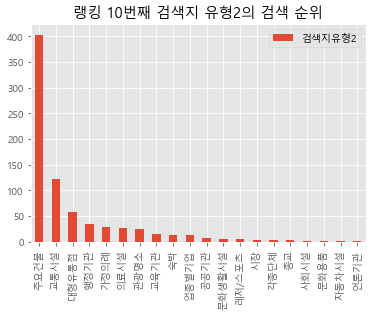

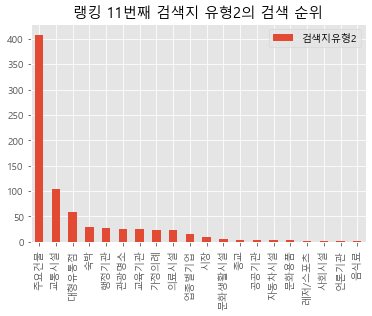

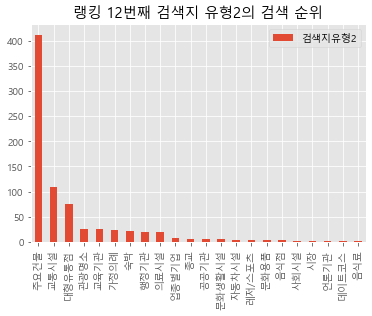

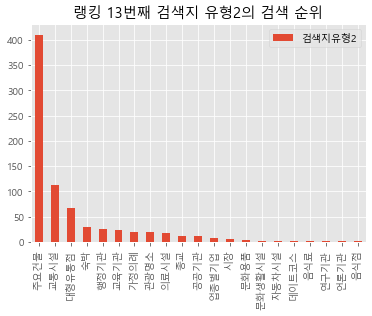

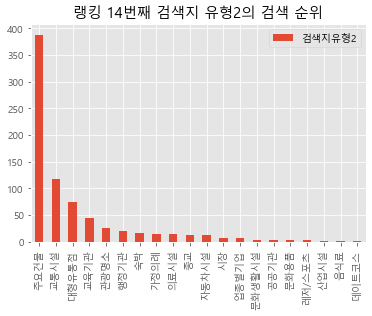

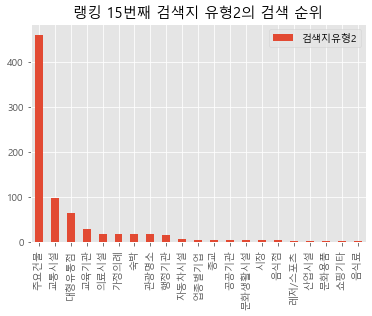

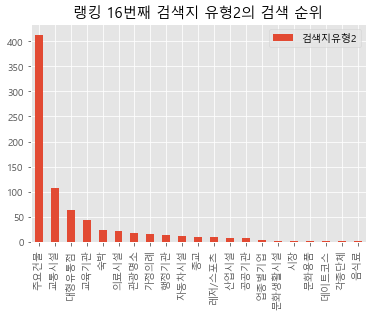

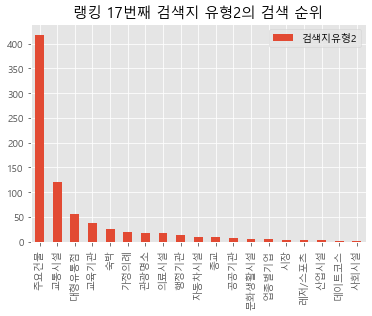

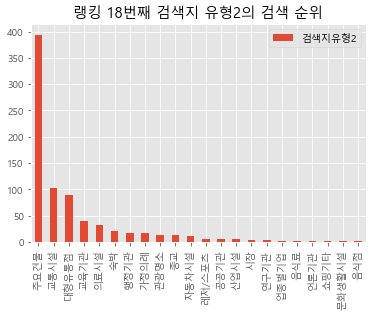

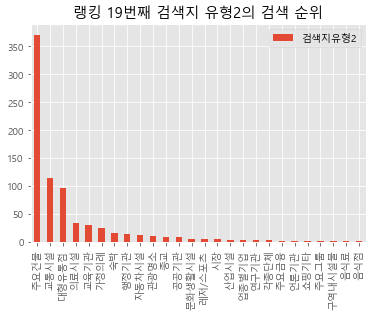

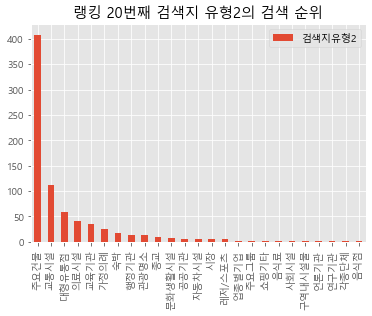

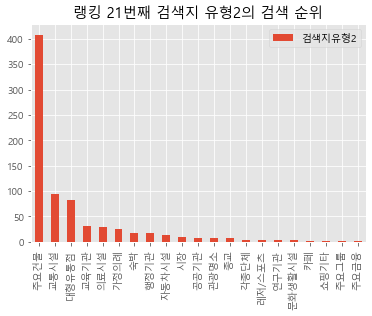

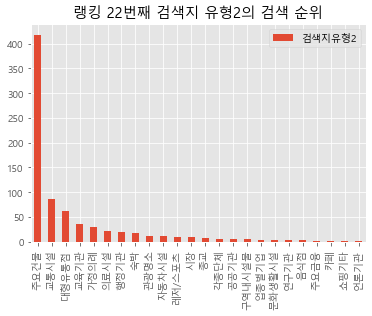

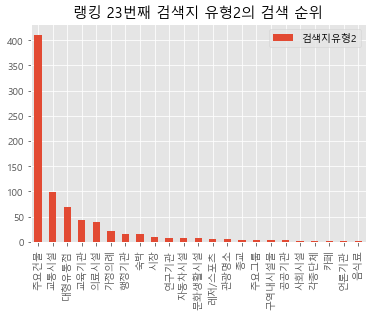

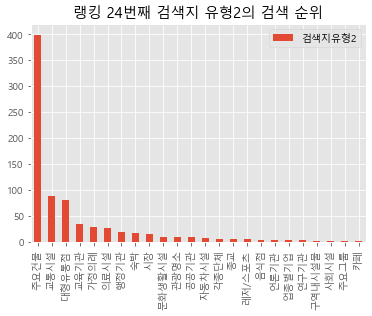

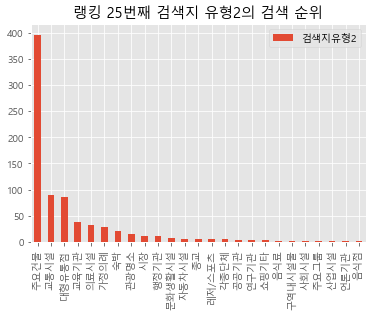

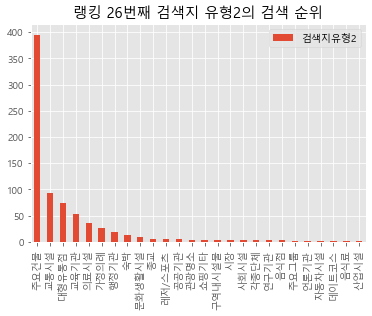

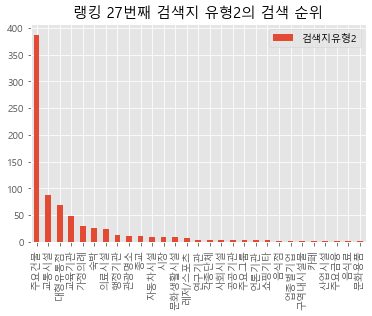

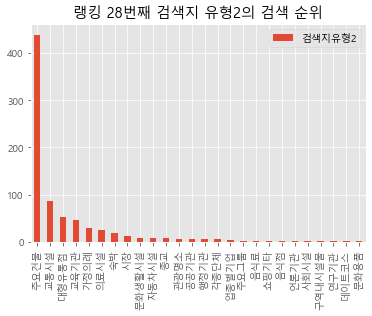

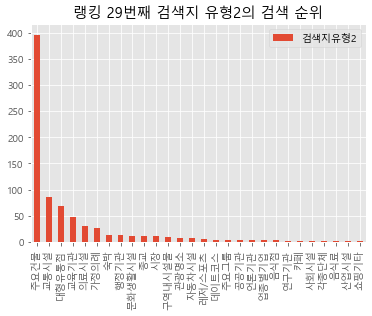

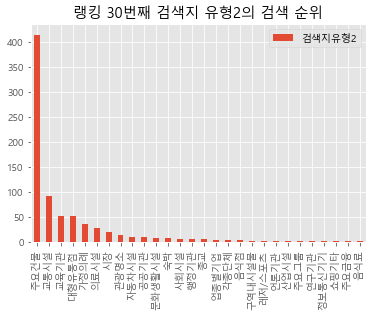

In [73]:
for i in list(Seoul_rank.keys()):
    Seoul_rank[i]['검색지유형2'].value_counts().to_frame().plot(kind = 'bar')
    plt.title("랭킹 {}번째 검색지 유형2의 검색 순위".format(i))

랭킹1을 제외하고 전부 주요건물 유형이 자주 보임.

랭킹 1순위로 되어있는 유형 2의 세부 검색 순위가 무엇인지 파악

##### 검색지 랭킹 1의 경우 세부적으로 어떤 것을 검색했는 지 파악

In [74]:
Seoul_rank[1][Seoul_rank[1]['검색지유형2'] == '교통시설']['검색지유형3'].value_counts().to_frame()

,검색지유형3
지하철역,124
기차역,31
공항,31
버스터미널,8


In [75]:
Seoul_rank[1][Seoul_rank[1]['검색지유형2'] == '의료시설']['검색지유형3'].value_counts().to_frame()

,검색지유형3
종합병원,183


In [76]:
Seoul_rank[1][Seoul_rank[1]['검색지유형2'] == '주요건물']['검색지유형3'].value_counts().to_frame()

,검색지유형3
아파트단지,78
아파트브랜드,62
주상복합,8
아파트형공장,2


##### 검색지 랭킹 2순위부터 30까지 "주요건물" 유형 내에서 어떤 유형3을 검색했는지 빈도 파악

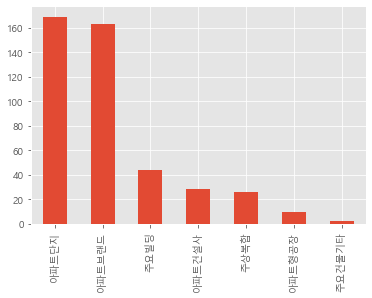

In [77]:
for i in range(2,10):
    Seoul_rank[i][Seoul_rank[i]['검색지유형2'] == '주요건물']['검색지유형3'].value_counts().plot(kind = 'bar')

In [78]:
import pandas_profiling

In [79]:
Seoul_Region.profile_report()